In [2]:
import shap
X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)
feature_names = list(X.columns)
feature_names

['Age',
 'Workclass',
 'Education-Num',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Country']

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581646,3.868892,10.080679,2.611836,6.572740,2.494518,3.665858,0.669205,1077.649170,87.303833,40.437454,36.718866
std,13.640442,1.455960,2.572562,1.506222,4.228857,1.758232,0.848806,0.470506,7385.911621,403.014771,12.347933,7.823782
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,37.000000,4.000000,10.000000,2.000000,7.000000,3.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,12.000000,4.000000,10.000000,4.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000
max,90.000000,8.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


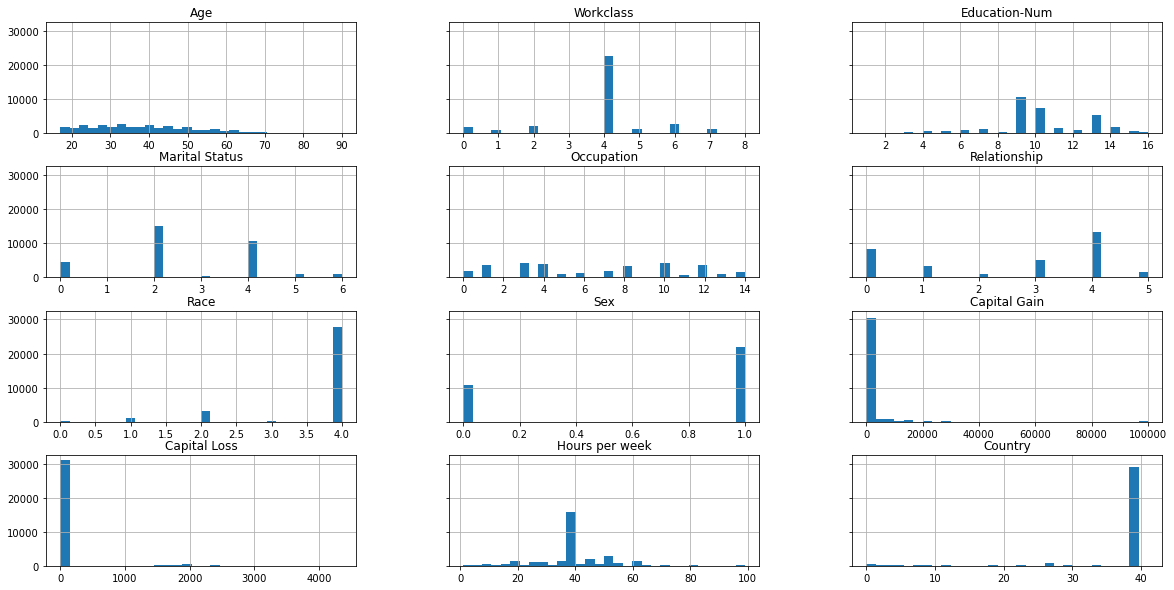

In [5]:
display(X.describe())
hist = X.hist(bins=30, sharey=True, figsize=(20,10))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_display = X_display.loc[X_train.index]

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
X_train_display = X_display.loc[X_train.index]
X_val_display = X_display.loc[X_val.index]

In [8]:
import pandas as pd
train = pd.concat([pd.Series(y_train, index=X_train.index,
                             name='Income>50K', dtype=int), X_train], axis=1)
validation = pd.concat([pd.Series(y_val, index=X_val.index,
                            name='Income>50K', dtype=int), X_val], axis=1)
test = pd.concat([pd.Series(y_test, index=X_test.index,
                            name='Income>50K', dtype=int), X_test], axis=1)

In [9]:
train

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
10911,1,47.0,4,9.0,2,3,4,4,1,0.0,0.0,40.0,39
17852,0,31.0,4,13.0,2,7,4,3,1,0.0,0.0,36.0,26
29165,1,32.0,4,10.0,2,13,5,4,0,0.0,0.0,32.0,39
30287,0,58.0,4,9.0,2,3,4,2,1,0.0,0.0,40.0,39
24019,0,17.0,4,6.0,4,6,3,4,1,0.0,0.0,20.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21168,0,43.0,4,8.0,2,14,4,4,1,0.0,0.0,40.0,39
6452,0,26.0,4,9.0,4,7,0,4,1,0.0,0.0,52.0,39
31352,0,32.0,7,14.0,2,10,4,4,1,0.0,0.0,50.0,39
6575,0,45.0,4,9.0,4,6,0,4,1,0.0,0.0,40.0,39


In [10]:
validation

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
16530,0,25.0,4,4.0,2,6,4,4,1,0.0,0.0,40.0,26
26723,0,41.0,6,9.0,2,5,5,4,0,0.0,0.0,40.0,39
3338,0,79.0,0,9.0,6,0,0,2,0,0.0,0.0,30.0,39
19367,1,43.0,2,15.0,2,10,4,4,1,15024.0,0.0,45.0,39
30274,0,51.0,5,9.0,4,12,2,4,1,0.0,0.0,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,0,46.0,7,9.0,2,13,4,4,1,0.0,0.0,40.0,39
5937,1,71.0,4,10.0,6,12,0,4,1,0.0,0.0,35.0,39
11034,0,36.0,4,9.0,5,14,2,4,1,0.0,0.0,60.0,26
2819,0,31.0,4,9.0,4,8,0,4,0,0.0,0.0,40.0,39


In [11]:
test

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
9646,0,62.0,6,4.0,6,8,0,4,0,0.0,0.0,66.0,39
709,0,18.0,4,7.0,4,8,2,4,1,0.0,0.0,25.0,39
7385,1,25.0,4,13.0,4,5,3,4,1,27828.0,0.0,50.0,39
16671,0,33.0,4,9.0,2,10,4,4,1,0.0,0.0,40.0,39
21932,0,36.0,4,7.0,4,7,1,4,0,0.0,0.0,40.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5889,1,39.0,4,13.0,2,10,5,4,0,0.0,0.0,20.0,39
25723,0,17.0,4,6.0,4,12,3,4,0,0.0,0.0,20.0,39
29514,0,35.0,4,9.0,4,14,3,4,1,0.0,0.0,40.0,39
1600,0,30.0,4,7.0,2,3,4,4,1,0.0,0.0,45.0,39


In [12]:
# Use 'csv' format to store the data
# The first column is expected to be the output column
train.to_csv('train.csv', index=False, header=False)
validation.to_csv('validation.csv', index=False, header=False)

In [13]:
import sagemaker, boto3, os
bucket = sagemaker.Session().default_bucket()
prefix = "demo-sagemaker-xgboost-adult-income-prediction"

boto3.Session().resource('s3').Bucket(bucket).Object(
    os.path.join(prefix, 'data/train.csv')).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(
    os.path.join(prefix, 'data/validation.csv')).upload_file('validation.csv')

In [14]:
! aws s3 ls {bucket}/{prefix}/data --recursive

2022-08-03 17:36:02     786285 demo-sagemaker-xgboost-adult-income-prediction/data/train.csv
2022-08-03 17:36:02     262122 demo-sagemaker-xgboost-adult-income-prediction/data/validation.csv


In [15]:
# Import the Amazon SageMaker Python SDK and start by retrieving the basic information from your current SageMaker session.

import sagemaker

region = sagemaker.Session().boto_region_name
print("AWS Region: {}".format(region))

role = sagemaker.get_execution_role()
print("RoleArn: {}".format(role))

AWS Region: us-east-2
RoleArn: arn:aws:iam::162009556600:role/service-role/AmazonSageMaker-ExecutionRole-20220803T130206


In [16]:
# Create an XGBoost estimator using the sagemaker.estimator.Estimator class. In the following example code, the XGBoost estimator is named xgb_model.

from sagemaker.debugger import Rule, rule_configs
from sagemaker.session import TrainingInput

s3_output_location='s3://{}/{}/{}'.format(bucket, prefix, 'xgboost_model')

container=sagemaker.image_uris.retrieve("xgboost", region, "1.2-1")
print(container)

xgb_model=sagemaker.estimator.Estimator(
    image_uri=container, # image_uri – Specify the training container image URI. In this example, the SageMaker XGBoost training container URI is specified using sagemaker.image_uris.retrieve.
    role=role, # role – The AWS Identity and Access Management (IAM) role that SageMaker uses to perform tasks on your behalf (for example, reading training results, call model artifacts from Amazon S3, and writing training results to Amazon S3).
    instance_count=1, 
    instance_type='ml.m4.xlarge',
    volume_size=5, # volume_size – The size, in GB, of the EBS storage volume to attach to the training instance. This must be large enough to store training data if you use File mode (File mode is on by default).
    output_path=s3_output_location, # output_path – The path to the S3 bucket where SageMaker stores the model artifact and training results.
    sagemaker_session=sagemaker.Session(), # sagemaker_session – The session object that manages interactions with SageMaker API operations and other AWS service that the training job uses.
    rules=[Rule.sagemaker(rule_configs.create_xgboost_report())]
)

257758044811.dkr.ecr.us-east-2.amazonaws.com/sagemaker-xgboost:1.2-1


In [17]:
xgb_model.set_hyperparameters(
    max_depth = 5,
    eta = 0.2,
    gamma = 4,
    min_child_weight = 6,
    subsample = 0.7,
    objective = "binary:logistic",
    num_round = 1000
)

In [18]:
from sagemaker.session import TrainingInput

train_input = TrainingInput(
    "s3://{}/{}/{}".format(bucket, prefix, "data/train.csv"), content_type="csv"
)
validation_input = TrainingInput(
    "s3://{}/{}/{}".format(bucket, prefix, "data/validation.csv"), content_type="csv"
)

In [19]:
xgb_model.fit({"train": train_input, "validation": validation_input}, wait=True)

2022-08-03 17:41:05 Starting - Starting the training job...
2022-08-03 17:41:31 Starting - Preparing the instances for trainingCreateXgboostReport: InProgress
ProfilerReport-1659548465: InProgress
.........
2022-08-03 17:43:04 Downloading - Downloading input data...
2022-08-03 17:43:37 Training - Downloading the training image.........
2022-08-03 17:45:05 Training - Training image download completed. Training in progress.[2022-08-03 17:44:52.150 ip-10-0-105-168.us-east-2.compute.internal:1 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of 

In [20]:
rule_output_path = xgb_model.output_path + "/" + xgb_model.latest_training_job.job_name + "/rule-output"
! aws s3 ls {rule_output_path} --recursive

2022-08-03 17:46:16     329720 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2022-08-03-17-41-05-716/rule-output/ProfilerReport-1659548465/profiler-output/profiler-report.html
2022-08-03 17:46:16     171106 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2022-08-03-17-41-05-716/rule-output/ProfilerReport-1659548465/profiler-output/profiler-report.ipynb
2022-08-03 17:46:12        191 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2022-08-03-17-41-05-716/rule-output/ProfilerReport-1659548465/profiler-output/profiler-reports/BatchSize.json
2022-08-03 17:46:12        199 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2022-08-03-17-41-05-716/rule-output/ProfilerReport-1659548465/profiler-output/profiler-reports/CPUBottleneck.json
2022-08-03 17:46:12        126 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2022-08-03-17-41-05-716/rul

In [21]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-2-162009556600/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2022-08-03-17-41-05-716/rule-output/ProfilerReport-1659548465/profiler-output/profiler-reports/OverallFrameworkMetrics.json to ProfilerReport-1659548465/profiler-output/profiler-reports/OverallFrameworkMetrics.json
download: s3://sagemaker-us-east-2-162009556600/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2022-08-03-17-41-05-716/rule-output/ProfilerReport-1659548465/profiler-output/profiler-reports/LowGPUUtilization.json to ProfilerReport-1659548465/profiler-output/profiler-reports/LowGPUUtilization.json
download: s3://sagemaker-us-east-2-162009556600/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2022-08-03-17-41-05-716/rule-output/ProfilerReport-1659548465/profiler-output/profiler-reports/CPUBottleneck.json to ProfilerReport-1659548465/profiler-output/profiler-reports/CPUBottleneck.json
downlo

In [22]:
from IPython.display import FileLink, FileLinks
display("Click link below to view the XGBoost Training report", FileLink("CreateXgboostReport/xgboost_report.html"))

'Click link below to view the XGBoost Training report'

/home/ec2-user/SageMaker/CreateXgboostReport/xgboost_report.html

In [23]:
xgb_model.model_data

's3://sagemaker-us-east-2-162009556600/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2022-08-03-17-41-05-716/output/model.tar.gz'

In [24]:
import sagemaker
from sagemaker.serializers import CSVSerializer
xgb_predictor=xgb_model.deploy(
    initial_instance_count=1,
    instance_type='ml.t2.medium',
    serializer=CSVSerializer()
)

--------------!

In [25]:
xgb_predictor.endpoint_name

'sagemaker-xgboost-2022-08-03-17-54-13-702'

In [26]:
import numpy as np
def predict(data, rows=1000):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join([predictions, xgb_predictor.predict(array).decode('utf-8')])
    return np.fromstring(predictions[1:], sep=',')

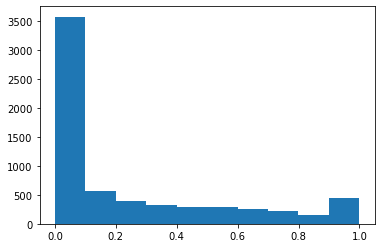

In [27]:
import matplotlib.pyplot as plt

predictions=predict(test.to_numpy()[:,1:])
plt.hist(predictions)
plt.show()

In [28]:
import sklearn

cutoff=0.5
print(sklearn.metrics.confusion_matrix(test.iloc[:, 0], np.where(predictions > cutoff, 1, 0)))
print(sklearn.metrics.classification_report(test.iloc[:, 0], np.where(predictions > cutoff, 1, 0)))

[[4670  356]
 [ 480 1007]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      5026
           1       0.74      0.68      0.71      1487

    accuracy                           0.87      6513
   macro avg       0.82      0.80      0.81      6513
weighted avg       0.87      0.87      0.87      6513



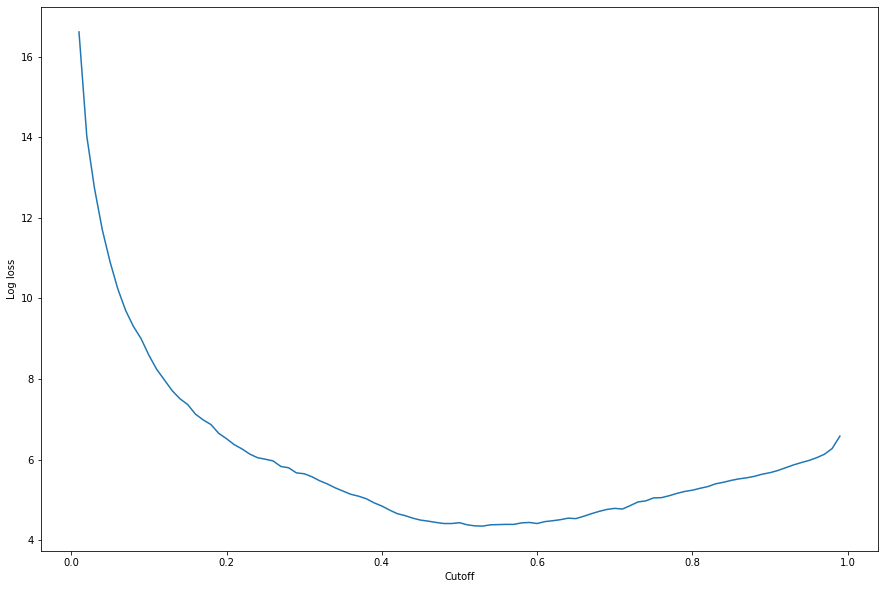

In [29]:
import matplotlib.pyplot as plt

cutoffs = np.arange(0.01, 1, 0.01)
log_loss = []
for c in cutoffs:
    log_loss.append(
        sklearn.metrics.log_loss(test.iloc[:, 0], np.where(predictions > c, 1, 0))
    )

plt.figure(figsize=(15,10))
plt.plot(cutoffs, log_loss)
plt.xlabel("Cutoff")
plt.ylabel("Log loss")
plt.show()

In [30]:
print(
    'Log loss is minimized at a cutoff of ', cutoffs[np.argmin(log_loss)], 
    ', and the log loss value at the minimum is ', np.min(log_loss)
)

Log loss is minimized at a cutoff of  0.53 , and the log loss value at the minimum is  4.348539186773897
